# Machine Learning II Final Project
# Stage 2: Data Pre-Processing

Group Members:
- Daniel Kruk
- Marcelo Junior

##### Notebook Index:
1 - Basic Pre-Processing Customer Info Dataset
 - 1.1 Customer Info - Education
 - 1.2 Customer Info - Birthdates
 - 1.3 Customer Info - Loyalty Card as a binary
 - 1.4 Customer Info - Gender
 - 1.5 Customer Info - Infinity inconsistencies
 - 1.6 Customer Info - Location
  
2 - Features' Correlation

3 - Feature Engineering

4 - Basic Pre-Processing Product Mapping Dataset

5 - Removing Supermarkets


In this project, we aim to segment customers of a retail store using demographic and transaction data. Our first step is to pre-process the data, which involves several operations such as identifying and handling missing values, transforming categorical variables into numeric variables, and creating new features to better capture the underlying patterns in the data. <br>
<br>
To start, we will examine the data using the `info()` and `describe()` functions to identify any issues such as missing values, outliers, or inconsistencies. We will then perform necessary data cleaning steps such as imputing missing values or dropping irrelevant columns.<br>
<br>
Next, we will transform the categorical variables into numeric variables using ordinal enconding. We will also create new features by combining existing ones or applying domain knowledge to generate meaningful insights.<br>
<br>
Finally, we will conduct a quality check on the pre-processed data to ensure that it is consistent, accurate, and free from any remaining issues. Once we are satisfied with the data, we will save it to a new file for further analysis and modeling.<br>
<br>
# Conclusion<br>
<br>
Overall, this pre-processing stage is crucial to the success of our customer segmentation project, as it sets the foundation for our analysis and modeling. By taking a systematic and rigorous approach, we can ensure that our data is of high quality and ready for further analysis.<br>
<br>

___

# Libraries

In [1]:
#This cell contains the packages required
#To run this notebook 
#Packages imported to treat the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


#Packages utilized to create the Correlation Matrix
import seaborn as sns

#Package utilized to resize the plots
from pylab import rcParams

#Package
import preproc_function as ppf

# Import Datasets

In [2]:
# Dataset Importation
path = 'Project Data/'

# Customer Info CSV
customer_info = pd.read_csv(path + "Customer Info Dataset.csv")

# Customer Basket CSV
customer_basket = pd.read_csv(path + "Customer Basket Dataset.csv")

# Product Mapping Excel File
product_mapping = pd.read_excel(path + "Product Mapping Excel File.xlsx")

We can now see the info and data types of the datasets.

In [3]:
print(' ' * 40 + 'Customer Info' + ' ' * 40)
display(customer_info.info())
print('----' * 20 + '\n')
print(' ' * 40 + 'Customer Basket' + ' ' * 40)
display(customer_basket.info())
print('----' * 20 + '\n')
print(' ' * 40 + 'Product Mapping' + ' ' * 40)
display(product_mapping.info())

                                        Customer Info                                        
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_id                              30000 non-null  int64  
 1   customer_name                            30000 non-null  object 
 2   customer_gender                          30000 non-null  object 
 3   customer_birthdate                       30000 non-null  object 
 4   kids_home                                30000 non-null  float64
 5   teens_home                               30000 non-null  float64
 6   number_complaints                        30000 non-null  float64
 7   distinct_stores_visited                  30000 non-null  float64
 8   lifetime_spend_groceries                 30000 non-null  float64
 9   lifetime_spend_electro

None

--------------------------------------------------------------------------------

                                        Customer Basket                                        
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    80000 non-null  int64 
 1   invoice_id     80000 non-null  int64 
 2   list_of_goods  80000 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.8+ MB


None

--------------------------------------------------------------------------------

                                        Product Mapping                                        
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  164 non-null    object
 1   category      164 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


None

An analysis into their values is also valuable.

In [4]:
print(' ' * 40 + 'Customer Info' + ' ' * 40)
display(customer_info.describe().T)
print('----' * 20 + '\n')
print(' ' * 40 + 'Customer Basket' + ' ' * 40)
display(customer_basket.describe().T)
print('----' * 20 + '\n')
print(' ' * 40 + 'Product Mapping' + ' ' * 40)
display(product_mapping.describe().T)

                                        Customer Info                                        


,count,mean,std,min,25%,50%,75%,max
customer_id,30000.0,1.500050e+04,8660.398374,1.000000e+00,7500.750000,15000.500000,22500.250000,30000.000000
kids_home,30000.0,1.146700e+00,1.234111,0.000000e+00,0.000000,1.000000,1.000000,10.000000
teens_home,30000.0,5.129333e-01,0.912502,0.000000e+00,0.000000,0.000000,1.000000,9.000000
number_complaints,30000.0,7.643667e-01,0.836341,0.000000e+00,0.000000,1.000000,1.000000,9.000000
distinct_stores_visited,30000.0,6.120767e+00,6.511410,0.000000e+00,2.000000,3.000000,8.000000,21.000000
lifetime_spend_groceries,30000.0,3.978634e+03,5280.641466,0.000000e+00,220.000000,950.000000,5253.000000,18852.000000
lifetime_spend_electronics,30000.0,9.652388e+02,1755.323397,1.058527e+00,45.000000,194.000000,721.000000,6603.000000
typical_hour,30000.0,-inf,NaN,-inf,9.000000,14.000000,20.000000,23.000000
lifetime_spend_vegetables,30000.0,5.642078e+02,481.819086,1.000000e+00,247.000000,425.000000,785.000000,1568.000000
lifetime_spend_nonalcohol_drinks,30000.0,6.287501e+02,496.346400,0.000000e+00,244.000000,425.000000,949.000000,1671.000000


--------------------------------------------------------------------------------

                                        Customer Basket                                        


,count,mean,std,min,25%,50%,75%,max
customer_id,80000.0,5.283106e+03,3.036515e+03,1.0,2668.0,5318.0,7944.0,10484.0
invoice_id,80000.0,6.121746e+06,3.519950e+06,20462.0,3082021.0,6125842.5,9168033.5,12242377.0


--------------------------------------------------------------------------------

                                        Product Mapping                                        


,count,unique,top,freq
product_name,164,162,asparagus,2
category,164,9,groceries,60


### 1. Basic Preprocessing <br>

#### 1.1 Customer Info - Education
It could be noticed that some customers start their names with their highest education level (Bsc., Msc. and Phd.). As this does not provide any value in the `customer_name` field, we can create a new column called `highest_education` which will provide us that information in a meaningful manner. <br>
We will first see the first 4 letters of every name, to see how are the education levels abbreviated (mostly to know about the Master degree, as MBA and MSc are some of the options it could take).

In [5]:
prefs = customer_info['customer_name'].str.slice(stop=4)

# Print the value counts of the first 4 letters
prefs.value_counts()

Bsc.    3815
Phd.    3810
Msc.    3807
Mich     354
Robe     341
        ... 
Babe       1
Juni       1
Ashe       1
Vito       1
Jae        1
Name: customer_name, Length: 1445, dtype: int64

As can be seen, the educaiton levels are `Bsc.`, `Msc.` and `Phd.`. <br>
We will now procced to create the new column, assigning a Null value for those which did not include it in their name.

In [6]:
# Create a copy for safety
ci_copy = customer_info.copy()

# List of educational levels previously seen to be extracted
edu_levels = ['Bsc.', 'Msc.', 'Phd.']

# Create a regular expression pattern to match the educational level
pattern = '|'.join(edu_levels)

# Extract the educational level
ci_copy['highest_education'] = ci_copy['customer_name'].str.extract('(' + pattern + ')')

# Remove the educational level from the 'customer_name' column
ci_copy['customer_name'] = ci_copy['customer_name'].str.replace(pattern, '').str.strip()

# Insert the 'education' column as the third column in the DataFrame
ci_copy.insert(2, 'highest_education', ci_copy.pop('highest_education'))

# To avoid having many NaNs, it was decided to give them the designation 'Missing'
ci_copy['highest_education'].fillna('Missing', inplace= True)

# See updated Customer Info
ci_copy

C:\Users\HP\AppData\Local\Temp\ipykernel_14076\708447921.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  ci_copy['customer_name'] = ci_copy['customer_name'].str.replace(pattern, '').str.strip()


,customer_id,customer_name,highest_education,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,...,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
0,4239,Sara Moscowitz,Missing,female,09/10/1999 03:11 PM,0.0,0.0,0.0,2.0,91.0,...,53.0,48.0,47.0,105.0,85.0,0.192154,2017.0,NaN,38.754263,-9.163397
1,19330,Donald Robertson,Missing,male,06/26/1981 10:58 PM,1.0,0.0,0.0,2.0,197.0,...,86.0,80.0,45.0,1964.0,85.0,0.098647,2015.0,NaN,38.777761,-9.156197
2,2272,Felicia Bradshaw,Phd.,female,01/31/1987 09:08 AM,1.0,1.0,0.0,20.0,397.0,...,204.0,170.0,46.0,5.0,408.0,0.497251,2008.0,NaN,38.785329,-9.127113
3,25288,Emma Williams,Missing,female,06/17/1942 12:02 AM,3.0,4.0,1.0,2.0,5282.0,...,1081.0,1068.0,617.0,1078.0,1956.0,0.206713,2010.0,NaN,38.744086,-9.156589
4,12829,Hilda Huerta,Missing,female,01/31/2000 11:43 AM,0.0,0.0,0.0,2.0,82.0,...,39.0,39.0,48.0,103.0,83.0,0.200625,2015.0,NaN,38.756024,-9.162970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,625,Karen Watts,Phd.,female,11/01/1974 05:26 AM,0.0,0.0,1.0,2.0,209.0,...,21.0,11.0,57.0,1984.0,112.0,0.096366,2008.0,935162.0,38.734446,-9.171911
29996,26447,Curtis Thompson,Missing,male,02/21/1986 11:27 AM,0.0,0.0,0.0,3.0,185.0,...,47.0,41.0,50.0,197.0,22.0,0.118998,2014.0,NaN,38.767070,-9.144301
29997,182,Richard Carter,Missing,male,01/14/2001 05:49 AM,0.0,0.0,0.0,2.0,83.0,...,55.0,52.0,51.0,94.0,77.0,0.199432,2016.0,953891.0,38.728487,-9.164140
29998,13768,Jerry Yoder,Missing,male,08/21/1958 12:12 PM,1.0,0.0,1.0,20.0,391.0,...,160.0,132.0,54.0,5.0,398.0,0.494527,2006.0,NaN,38.751123,-9.182512


In [7]:
ci_copy['highest_education'].value_counts()

Missing    18568
Bsc.        3815
Phd.        3810
Msc.        3807
Name: highest_education, dtype: int64

In [8]:
# Apply the changes to original customer_info
customer_info = ci_copy.copy()

customer_info

,customer_id,customer_name,highest_education,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,...,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
0,4239,Sara Moscowitz,Missing,female,09/10/1999 03:11 PM,0.0,0.0,0.0,2.0,91.0,...,53.0,48.0,47.0,105.0,85.0,0.192154,2017.0,NaN,38.754263,-9.163397
1,19330,Donald Robertson,Missing,male,06/26/1981 10:58 PM,1.0,0.0,0.0,2.0,197.0,...,86.0,80.0,45.0,1964.0,85.0,0.098647,2015.0,NaN,38.777761,-9.156197
2,2272,Felicia Bradshaw,Phd.,female,01/31/1987 09:08 AM,1.0,1.0,0.0,20.0,397.0,...,204.0,170.0,46.0,5.0,408.0,0.497251,2008.0,NaN,38.785329,-9.127113
3,25288,Emma Williams,Missing,female,06/17/1942 12:02 AM,3.0,4.0,1.0,2.0,5282.0,...,1081.0,1068.0,617.0,1078.0,1956.0,0.206713,2010.0,NaN,38.744086,-9.156589
4,12829,Hilda Huerta,Missing,female,01/31/2000 11:43 AM,0.0,0.0,0.0,2.0,82.0,...,39.0,39.0,48.0,103.0,83.0,0.200625,2015.0,NaN,38.756024,-9.162970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,625,Karen Watts,Phd.,female,11/01/1974 05:26 AM,0.0,0.0,1.0,2.0,209.0,...,21.0,11.0,57.0,1984.0,112.0,0.096366,2008.0,935162.0,38.734446,-9.171911
29996,26447,Curtis Thompson,Missing,male,02/21/1986 11:27 AM,0.0,0.0,0.0,3.0,185.0,...,47.0,41.0,50.0,197.0,22.0,0.118998,2014.0,NaN,38.767070,-9.144301
29997,182,Richard Carter,Missing,male,01/14/2001 05:49 AM,0.0,0.0,0.0,2.0,83.0,...,55.0,52.0,51.0,94.0,77.0,0.199432,2016.0,953891.0,38.728487,-9.164140
29998,13768,Jerry Yoder,Missing,male,08/21/1958 12:12 PM,1.0,0.0,1.0,20.0,391.0,...,160.0,132.0,54.0,5.0,398.0,0.494527,2006.0,NaN,38.751123,-9.182512


We are now able to encode this variable, so as to better analyse it in further notebooks. As such, the current values shall take:
- Missing: 0
- Bsc.: 1
- Msc.: 2
- Phd.: 3

In [9]:
# We can use a function we created from Preproc_Function to encode this variable.
# It takes 3 parameters: dataframe, column_name, categories
ppf.encode_categorical_variable(customer_info, 
                                'highest_education', 
                                ['Missing', 'Bsc.', 'Msc.', 'Phd.'])

customer_info

,customer_id,customer_name,highest_education,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,...,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
0,4239,Sara Moscowitz,0,female,09/10/1999 03:11 PM,0.0,0.0,0.0,2.0,91.0,...,53.0,48.0,47.0,105.0,85.0,0.192154,2017.0,NaN,38.754263,-9.163397
1,19330,Donald Robertson,0,male,06/26/1981 10:58 PM,1.0,0.0,0.0,2.0,197.0,...,86.0,80.0,45.0,1964.0,85.0,0.098647,2015.0,NaN,38.777761,-9.156197
2,2272,Felicia Bradshaw,3,female,01/31/1987 09:08 AM,1.0,1.0,0.0,20.0,397.0,...,204.0,170.0,46.0,5.0,408.0,0.497251,2008.0,NaN,38.785329,-9.127113
3,25288,Emma Williams,0,female,06/17/1942 12:02 AM,3.0,4.0,1.0,2.0,5282.0,...,1081.0,1068.0,617.0,1078.0,1956.0,0.206713,2010.0,NaN,38.744086,-9.156589
4,12829,Hilda Huerta,0,female,01/31/2000 11:43 AM,0.0,0.0,0.0,2.0,82.0,...,39.0,39.0,48.0,103.0,83.0,0.200625,2015.0,NaN,38.756024,-9.162970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,625,Karen Watts,3,female,11/01/1974 05:26 AM,0.0,0.0,1.0,2.0,209.0,...,21.0,11.0,57.0,1984.0,112.0,0.096366,2008.0,935162.0,38.734446,-9.171911
29996,26447,Curtis Thompson,0,male,02/21/1986 11:27 AM,0.0,0.0,0.0,3.0,185.0,...,47.0,41.0,50.0,197.0,22.0,0.118998,2014.0,NaN,38.767070,-9.144301
29997,182,Richard Carter,0,male,01/14/2001 05:49 AM,0.0,0.0,0.0,2.0,83.0,...,55.0,52.0,51.0,94.0,77.0,0.199432,2016.0,953891.0,38.728487,-9.164140
29998,13768,Jerry Yoder,0,male,08/21/1958 12:12 PM,1.0,0.0,1.0,20.0,391.0,...,160.0,132.0,54.0,5.0,398.0,0.494527,2006.0,NaN,38.751123,-9.182512


In [10]:
# Check values
display(customer_info['highest_education'].value_counts())

0    18568
1     3815
3     3810
2     3807
Name: highest_education, dtype: int64

#### 1.2 Customer Info - Birthdates
Instead of working with birthdates, it is better to work with `Age`, as it is a better measure to group customers. <br>
As it is stored as an `object`, a transformation into `timedate54` is needed to thus turn it into age based on a specified date.

In [11]:
# Create a copy for safety again
ci_copy = customer_info.copy()

# Define the date format and the specified date with the same format
date_format = "%m/%d/%Y %I:%M %p"

spec_date_str = '03/08/2023 12:00 PM'
spec_date = datetime.strptime(spec_date_str, date_format)


# Define a lambda function to calculate the age from their birth date
age_calc = lambda x: spec_date.year - datetime.strptime(x,date_format).year - ((spec_date.month, spec_date.day) < (datetime.strptime(x, date_format).month, datetime.strptime(x, date_format).day))

# Modify the customer_birthdate column and renaming it to Age
ci_copy['customer_birthdate'] = ci_copy['customer_birthdate'].apply(age_calc)
ci_copy = ci_copy.rename(columns={'customer_birthdate': 'Age'})

# See the updated DataFrame
ci_copy

,customer_id,customer_name,highest_education,customer_gender,Age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,...,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
0,4239,Sara Moscowitz,0,female,23,0.0,0.0,0.0,2.0,91.0,...,53.0,48.0,47.0,105.0,85.0,0.192154,2017.0,NaN,38.754263,-9.163397
1,19330,Donald Robertson,0,male,41,1.0,0.0,0.0,2.0,197.0,...,86.0,80.0,45.0,1964.0,85.0,0.098647,2015.0,NaN,38.777761,-9.156197
2,2272,Felicia Bradshaw,3,female,36,1.0,1.0,0.0,20.0,397.0,...,204.0,170.0,46.0,5.0,408.0,0.497251,2008.0,NaN,38.785329,-9.127113
3,25288,Emma Williams,0,female,80,3.0,4.0,1.0,2.0,5282.0,...,1081.0,1068.0,617.0,1078.0,1956.0,0.206713,2010.0,NaN,38.744086,-9.156589
4,12829,Hilda Huerta,0,female,23,0.0,0.0,0.0,2.0,82.0,...,39.0,39.0,48.0,103.0,83.0,0.200625,2015.0,NaN,38.756024,-9.162970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,625,Karen Watts,3,female,48,0.0,0.0,1.0,2.0,209.0,...,21.0,11.0,57.0,1984.0,112.0,0.096366,2008.0,935162.0,38.734446,-9.171911
29996,26447,Curtis Thompson,0,male,37,0.0,0.0,0.0,3.0,185.0,...,47.0,41.0,50.0,197.0,22.0,0.118998,2014.0,NaN,38.767070,-9.144301
29997,182,Richard Carter,0,male,22,0.0,0.0,0.0,2.0,83.0,...,55.0,52.0,51.0,94.0,77.0,0.199432,2016.0,953891.0,38.728487,-9.164140
29998,13768,Jerry Yoder,0,male,64,1.0,0.0,1.0,20.0,391.0,...,160.0,132.0,54.0,5.0,398.0,0.494527,2006.0,NaN,38.751123,-9.182512


As everything looks fine, we can move this changes to the original dataframe.

In [12]:
customer_info = ci_copy.copy()
customer_info

,customer_id,customer_name,highest_education,customer_gender,Age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,...,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
0,4239,Sara Moscowitz,0,female,23,0.0,0.0,0.0,2.0,91.0,...,53.0,48.0,47.0,105.0,85.0,0.192154,2017.0,NaN,38.754263,-9.163397
1,19330,Donald Robertson,0,male,41,1.0,0.0,0.0,2.0,197.0,...,86.0,80.0,45.0,1964.0,85.0,0.098647,2015.0,NaN,38.777761,-9.156197
2,2272,Felicia Bradshaw,3,female,36,1.0,1.0,0.0,20.0,397.0,...,204.0,170.0,46.0,5.0,408.0,0.497251,2008.0,NaN,38.785329,-9.127113
3,25288,Emma Williams,0,female,80,3.0,4.0,1.0,2.0,5282.0,...,1081.0,1068.0,617.0,1078.0,1956.0,0.206713,2010.0,NaN,38.744086,-9.156589
4,12829,Hilda Huerta,0,female,23,0.0,0.0,0.0,2.0,82.0,...,39.0,39.0,48.0,103.0,83.0,0.200625,2015.0,NaN,38.756024,-9.162970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,625,Karen Watts,3,female,48,0.0,0.0,1.0,2.0,209.0,...,21.0,11.0,57.0,1984.0,112.0,0.096366,2008.0,935162.0,38.734446,-9.171911
29996,26447,Curtis Thompson,0,male,37,0.0,0.0,0.0,3.0,185.0,...,47.0,41.0,50.0,197.0,22.0,0.118998,2014.0,NaN,38.767070,-9.144301
29997,182,Richard Carter,0,male,22,0.0,0.0,0.0,2.0,83.0,...,55.0,52.0,51.0,94.0,77.0,0.199432,2016.0,953891.0,38.728487,-9.164140
29998,13768,Jerry Yoder,0,male,64,1.0,0.0,1.0,20.0,391.0,...,160.0,132.0,54.0,5.0,398.0,0.494527,2006.0,NaN,38.751123,-9.182512


#### 1.3 Customer Info - Loyalty Card as a binary
Instead of having their specific loyalty card, the information can be better given if it is only known whether they have one or not, as theirs value does not matter much. It was decided to create, for now, a new variable `HasLoyaltyCard`.

In [13]:
# Replace NaNs with 0 and a valid loyalty card value with 1
customer_info['has_loyalty_card'] = customer_info['loyalty_card_number'].notna().astype(int)
customer_info

,customer_id,customer_name,highest_education,customer_gender,Age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,has_loyalty_card
0,4239,Sara Moscowitz,0,female,23,0.0,0.0,0.0,2.0,91.0,...,48.0,47.0,105.0,85.0,0.192154,2017.0,NaN,38.754263,-9.163397,0
1,19330,Donald Robertson,0,male,41,1.0,0.0,0.0,2.0,197.0,...,80.0,45.0,1964.0,85.0,0.098647,2015.0,NaN,38.777761,-9.156197,0
2,2272,Felicia Bradshaw,3,female,36,1.0,1.0,0.0,20.0,397.0,...,170.0,46.0,5.0,408.0,0.497251,2008.0,NaN,38.785329,-9.127113,0
3,25288,Emma Williams,0,female,80,3.0,4.0,1.0,2.0,5282.0,...,1068.0,617.0,1078.0,1956.0,0.206713,2010.0,NaN,38.744086,-9.156589,0
4,12829,Hilda Huerta,0,female,23,0.0,0.0,0.0,2.0,82.0,...,39.0,48.0,103.0,83.0,0.200625,2015.0,NaN,38.756024,-9.162970,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,625,Karen Watts,3,female,48,0.0,0.0,1.0,2.0,209.0,...,11.0,57.0,1984.0,112.0,0.096366,2008.0,935162.0,38.734446,-9.171911,1
29996,26447,Curtis Thompson,0,male,37,0.0,0.0,0.0,3.0,185.0,...,41.0,50.0,197.0,22.0,0.118998,2014.0,NaN,38.767070,-9.144301,0
29997,182,Richard Carter,0,male,22,0.0,0.0,0.0,2.0,83.0,...,52.0,51.0,94.0,77.0,0.199432,2016.0,953891.0,38.728487,-9.164140,1
29998,13768,Jerry Yoder,0,male,64,1.0,0.0,1.0,20.0,391.0,...,132.0,54.0,5.0,398.0,0.494527,2006.0,NaN,38.751123,-9.182512,0


#### 1.4 Customer Info - Gender
Something similar can be done with `Gender` by transforming it into a binary variable, by assigning the value **1** to Males and **0** to Females.

In [14]:
ppf.encode_categorical_variable(customer_info, 'customer_gender', ['female', 'male'])
customer_info

,customer_id,customer_name,highest_education,customer_gender,Age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,has_loyalty_card
0,4239,Sara Moscowitz,0,0,23,0.0,0.0,0.0,2.0,91.0,...,48.0,47.0,105.0,85.0,0.192154,2017.0,NaN,38.754263,-9.163397,0
1,19330,Donald Robertson,0,1,41,1.0,0.0,0.0,2.0,197.0,...,80.0,45.0,1964.0,85.0,0.098647,2015.0,NaN,38.777761,-9.156197,0
2,2272,Felicia Bradshaw,3,0,36,1.0,1.0,0.0,20.0,397.0,...,170.0,46.0,5.0,408.0,0.497251,2008.0,NaN,38.785329,-9.127113,0
3,25288,Emma Williams,0,0,80,3.0,4.0,1.0,2.0,5282.0,...,1068.0,617.0,1078.0,1956.0,0.206713,2010.0,NaN,38.744086,-9.156589,0
4,12829,Hilda Huerta,0,0,23,0.0,0.0,0.0,2.0,82.0,...,39.0,48.0,103.0,83.0,0.200625,2015.0,NaN,38.756024,-9.162970,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,625,Karen Watts,3,0,48,0.0,0.0,1.0,2.0,209.0,...,11.0,57.0,1984.0,112.0,0.096366,2008.0,935162.0,38.734446,-9.171911,1
29996,26447,Curtis Thompson,0,1,37,0.0,0.0,0.0,3.0,185.0,...,41.0,50.0,197.0,22.0,0.118998,2014.0,NaN,38.767070,-9.144301,0
29997,182,Richard Carter,0,1,22,0.0,0.0,0.0,2.0,83.0,...,52.0,51.0,94.0,77.0,0.199432,2016.0,953891.0,38.728487,-9.164140,1
29998,13768,Jerry Yoder,0,1,64,1.0,0.0,1.0,20.0,391.0,...,132.0,54.0,5.0,398.0,0.494527,2006.0,NaN,38.751123,-9.182512,0


#### 1.5 Customer Info - Infinity inconsistencies
Lastly, as seen in the describe method, we will see what is happening with those variables (`lifetime_spend_videogames` and `typical_hour`) who have a `-inf` value as minimun.

In [15]:
inf_customers = customer_info[['customer_id',
                                'customer_name',
                                'lifetime_spend_videogames',
                                'typical_hour',
                                'latitude',
                                'longitude']].loc[
                                    (customer_info['typical_hour'] == -np.inf) |
                                    (customer_info['lifetime_spend_videogames'] == -np.inf)]
inf_customers

,customer_id,customer_name,lifetime_spend_videogames,typical_hour,latitude,longitude
245,1441,Fausto`s Supermarket,-inf,0.575646,38.866242,-9.110871
277,3399,Sandy`s Supermarket,-inf,0.447940,38.866366,-9.111207
325,8086,Eugene`s Supermarket,-inf,0.173287,38.865887,-9.111353
339,9706,Michele`s Supermarket,-inf,0.708303,38.866273,-9.111174
770,17805,Robert`s Supermarket,-inf,0.599474,38.866607,-9.111206
...,...,...,...,...,...,...
28257,4689,Justin`s Supermarket,-inf,0.621227,38.866031,-9.111438
28590,16270,Melissa`s Supermarket,-inf,0.519860,38.865962,-9.110773
29259,10262,Francis`s Supermarket,-inf,0.693147,38.866438,-9.111502
29782,25570,Tracy`s Supermarket,-inf,0.677013,38.866384,-9.110784


In [16]:
customer_info.loc[(customer_info['typical_hour'] == -np.inf)]

,customer_id,customer_name,highest_education,customer_gender,Age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,has_loyalty_card
12774,8592,Charles`s Supermarket,0,1,35,0.0,0.0,0.0,1.0,2.64414,...,35005.0,1.540302,-inf,0.95716,0.196409,2013.0,NaN,38.866685,-9.111366,0
23915,101,Annie`s Supermarket,0,0,75,0.0,0.0,0.0,1.0,2.65918,...,34702.0,1.553652,-inf,0.91589,0.194451,2009.0,910065.0,38.866048,-9.111718,1


As can be seen, these customers are not people but rather Supermarkets, with both variables being studied assuming `-inf`. <br>
It can be also seem that they all seem to be less than a second of latitude and longitude from each other. <br>
These customers will be kept until the final steps of the project, before deciding wheter to keep them in the analysis or discard them for a possibly better one. <br>
<br>
So as to make the analysis better, these `-inf` will be transformed into `0`, so as to have little effect on the result while still allowing new variables to be created for them.

In [17]:
# Replace -np.inf with NaN in lifetime_spend_videogames and typical_hour
customer_info['lifetime_spend_videogames'].replace(-np.inf, 0, inplace=True)
customer_info['typical_hour'].replace(-np.inf, 0, inplace=True)

In [18]:
# See final result
infinity_customers = inf_customers['customer_id']

customer_info[customer_info['customer_id'].isin(infinity_customers)][['customer_id', 'lifetime_spend_videogames', 'typical_hour']]


,customer_id,lifetime_spend_videogames,typical_hour
245,1441,0.0,0.575646
277,3399,0.0,0.447940
325,8086,0.0,0.173287
339,9706,0.0,0.708303
770,17805,0.0,0.599474
...,...,...,...
28257,4689,0.0,0.621227
28590,16270,0.0,0.519860
29259,10262,0.0,0.693147
29782,25570,0.0,0.677013


Everything seems right, thus we can proceed to the next part.

#### 1.6 Customer Info - Location
Another meaningful insight would be to find duplicate customers and distinct customers who possible share the same address. <br>
As such, we can join `latitude` and `longitude` and group the data by them.

In [19]:
# Group the data by longitude and latitude and count the number of occurrences of each unique combination
duplicate_coords = customer_info.groupby(['longitude']).filter(lambda x: len(x) > 1)

# Display the duplicate coordinates
duplicate_coords

,customer_id,customer_name,highest_education,customer_gender,Age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,has_loyalty_card
5,12267,Anthony Brown,1,1,54,0.0,1.0,0.0,2.0,639.0,...,0.0,96.0,63.0,199.0,0.051745,2020.0,NaN,38.716977,-9.152628,0
55,25351,Demarcus Haveman,0,1,63,2.0,2.0,1.0,3.0,4769.0,...,1125.0,555.0,995.0,1868.0,0.199298,2006.0,NaN,38.781864,-9.098630,0
72,551,Jean Pinette,1,0,35,1.0,2.0,1.0,3.0,5065.0,...,1045.0,497.0,1159.0,2143.0,0.196566,2007.0,961207.0,38.748029,-9.098630,1
98,16555,Frank White,0,1,45,2.0,3.0,1.0,2.0,5219.0,...,1097.0,550.0,987.0,2024.0,0.206686,2013.0,NaN,38.763675,-9.098630,0
125,24734,Lee Chaffin,0,1,29,1.0,0.0,0.0,3.0,203.0,...,11.0,46.0,2100.0,117.0,0.100475,2013.0,NaN,38.708110,-9.152628,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29688,21252,Adam Morris,0,1,41,4.0,1.0,1.0,3.0,5133.0,...,1203.0,484.0,1018.0,2185.0,0.202992,2009.0,NaN,38.745320,-9.098630,0
29739,1666,Marissa Hewitt,1,0,30,1.0,1.0,0.0,3.0,1044.0,...,0.0,107.0,51.0,205.0,0.049974,2009.0,NaN,38.712255,-9.152628,0
29792,11686,Herman Revilla,3,1,80,5.0,3.0,1.0,3.0,4967.0,...,916.0,562.0,1176.0,2014.0,0.191917,2015.0,NaN,38.764272,-9.098630,0
29807,26548,Oliver Holliman,0,1,68,2.0,1.0,0.0,2.0,910.0,...,0.0,98.0,44.0,186.0,0.050411,2012.0,NaN,38.719799,-9.152628,0


Some customers share very similar longitude but, due to the lack of specific information regarding adults in househould, it is senseless to group them in the same household, even if they are less than 30 metres apart. <br>
As such, nothing else will be done regarding these variables.

### 2. Features' Correlation
This part is dedicated to the analysis of the correlation between the variables of the dataset. For this, a Correlation Matrix would be done.

In [20]:
# Set the figure size for the graph
rcParams['figure.figsize'] = 16,8

C:\Users\HP\AppData\Local\Temp\ipykernel_14076\3269974019.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = customer_info.drop(['customer_id', 'loyalty_card_number'], axis = 1).corr()


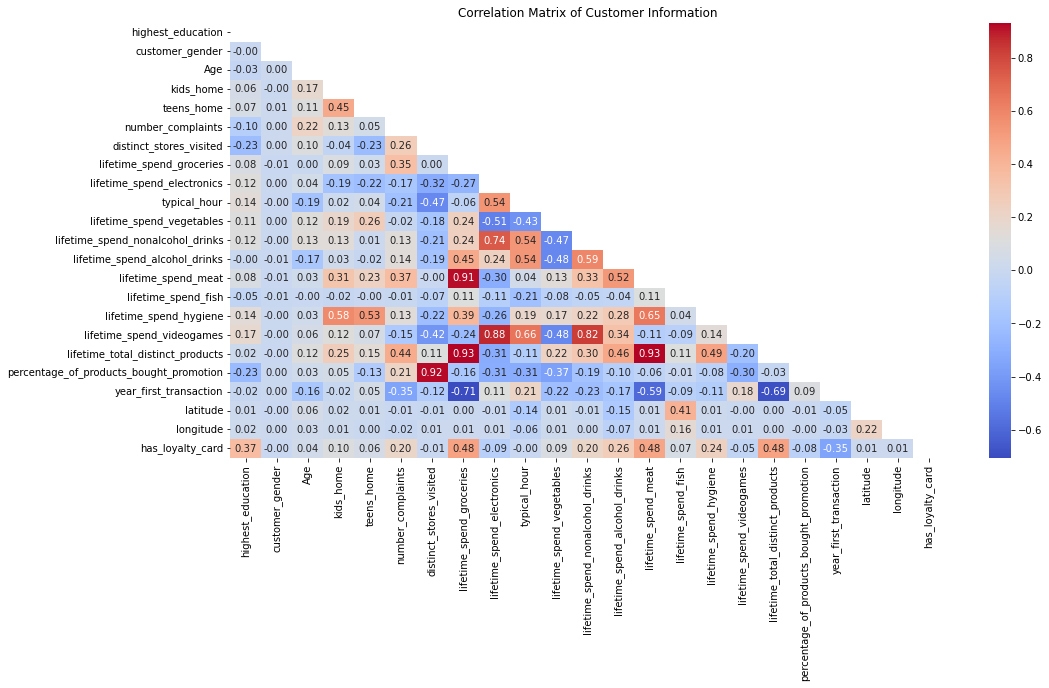

In [21]:
# create correlation matrix
corr = customer_info.drop(['customer_id', 'loyalty_card_number'], axis = 1).corr()

# create mask for lower triangle of correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))


# plot heatmap with mask and annotated values
sns.heatmap(corr, cmap='coolwarm', mask=mask, annot=True, fmt='.2f')

# set plot title
plt.title('Correlation Matrix of Customer Information')

# show plot
plt.show()

A correlation above |0.7| is considered quite high and, as such, feature selection and engineering should be done. The highly correlated variables are as follows: <br>
* *distinct_store_visited* and *percentage_of_products_bought_promotion* have a really high correlation, being even almost perfectly correlated. For interpretability later one, they will be kept as is.
* *lifetime_total_distinct_products* is highly correlated with both *lifetime_spend_groceries* and *lifetime_spend_meat*, the latter are also highly correlated between them.
* *lifetime_spend_groceries* is obviously negatively correlated with *year_first_transaction*, as these customers have had less time to buy products.
* *lifetime_spend_videogames* is highly correlated with *lifetime_spend_electronics* and *lifetime_spend_nonalcohol_drinks*, which are somewhat correlated between themselves.


We can proced to the feature engineering, taking this into account.

### 3. Feature Engineering
This part is dedicated to the creation of new variables which could summarise the data and prove themselves useful

The variables that will be created are: <br>
* total_minors: the total number of kids and teens in the household of each customer.
* total_spending: the total amount spent on all categories by each customer.
* lifetime_spend_tech: the total amount spent on videogames and electronics.

In [22]:
## total_minors - join the number of kids to the number of teens
customer_info['total_minors'] = customer_info['kids_home'] + customer_info['teens_home']

## total_spending - the total amount spent by the customers
customer_info['total_spending'] = (customer_info['lifetime_spend_groceries'] + customer_info['lifetime_spend_electronics'] + customer_info['lifetime_spend_vegetables'] + 
customer_info['lifetime_spend_nonalcohol_drinks'] + customer_info['lifetime_spend_alcohol_drinks'] + customer_info['lifetime_spend_meat'] + 
customer_info['lifetime_spend_fish'] + customer_info['lifetime_spend_hygiene'] + customer_info['lifetime_spend_videogames'])
customer_info['lifetime_spend_tech'] = customer_info['lifetime_spend_electronics'] + customer_info['lifetime_spend_videogames']
customer_info

,customer_id,customer_name,highest_education,customer_gender,Age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,...,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,has_loyalty_card,total_minors,total_spending,lifetime_spend_tech
0,4239,Sara Moscowitz,0,0,23,0.0,0.0,0.0,2.0,91.0,...,85.0,0.192154,2017.0,NaN,38.754263,-9.163397,0,0.0,1545.0,125.0
1,19330,Donald Robertson,0,1,41,1.0,0.0,0.0,2.0,197.0,...,85.0,0.098647,2015.0,NaN,38.777761,-9.156197,0,1.0,10219.0,7922.0
2,2272,Felicia Bradshaw,3,0,36,1.0,1.0,0.0,20.0,397.0,...,408.0,0.497251,2008.0,NaN,38.785329,-9.127113,0,2.0,1753.0,25.0
3,25288,Emma Williams,0,0,80,3.0,4.0,1.0,2.0,5282.0,...,1956.0,0.206713,2010.0,NaN,38.744086,-9.156589,0,7.0,11195.0,1315.0
4,12829,Hilda Huerta,0,0,23,0.0,0.0,0.0,2.0,82.0,...,83.0,0.200625,2015.0,NaN,38.756024,-9.162970,0,0.0,1370.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,625,Karen Watts,3,0,48,0.0,0.0,1.0,2.0,209.0,...,112.0,0.096366,2008.0,935162.0,38.734446,-9.171911,1,0.0,9730.0,7458.0
29996,26447,Curtis Thompson,0,1,37,0.0,0.0,0.0,3.0,185.0,...,22.0,0.118998,2014.0,NaN,38.767070,-9.144301,0,0.0,2416.0,1263.0
29997,182,Richard Carter,0,1,22,0.0,0.0,0.0,2.0,83.0,...,77.0,0.199432,2016.0,953891.0,38.728487,-9.164140,1,0.0,1491.0,117.0
29998,13768,Jerry Yoder,0,1,64,1.0,0.0,1.0,20.0,391.0,...,398.0,0.494527,2006.0,NaN,38.751123,-9.182512,0,1.0,1608.0,25.0


This concludes the preprocessing part for `customer_info`. We can now work on `product_mapping`.

___

### 4. Basic Pre-Processing Product Mapping Dataset

We will now procced to analyse the `product_mapping` file to see wheter any irregularities exist. <br>
An analysis of the `customer_basket` file is not deemed necessary for now, and will be done when performing association rules.                  

The biggest thing is to see wheter a product pertains to more than one category. We can do this by looking for duplicates.

In [23]:
product_mapping[product_mapping['product_name'].duplicated(keep=False)]

,product_name,category
14,airpods,electronics
128,asparagus,vegetables
135,asparagus,vegetables
153,airpods,videogames


It seems that Airpods have more than one category, which does not make sense, and that Asparagus appears twice with the same category. <br>
As AirPods are not videogames, we can drop the columns which feature this combination in the dataframe, alongside the duplicated Asparagus row. <br>

In [24]:
# Drop duplicated rows
product_mapping.drop([153, 135], inplace = True)

With this done, the preprocessing on `product_mapping` is concluded and we can now export the new version.

### 5. Removing Supermarkets
As seen before, Supermarkets present all the `NaN` values in the dataset. As these customers are not individual, and thus have much different habits from them, we shall remove them to better analyse the individual customers.

In [25]:
# Create a new dataset only with Supermarkets
supermarket_info = customer_info[customer_info['customer_id'].isin(infinity_customers)].copy()

# Remove these observations from the original dataset
customer_info = customer_info[-customer_info['customer_id'].isin(infinity_customers)]

In [26]:
display(supermarket_info[supermarket_info['typical_hour'] < 0.8][['customer_name', 'typical_hour']])
 # All of them buy between 00:00 - 01:00, which is not a big scope.
 # Because of this, it will be dropped alongside lifetime_spend_videogame, due to the high amount of NaN.
supermarket_info.drop(['lifetime_spend_videogames', 'typical_hour'], axis = 1, inplace = True)
display(supermarket_info)

,customer_name,typical_hour
245,Fausto`s Supermarket,0.575646
277,Sandy`s Supermarket,0.447940
325,Eugene`s Supermarket,0.173287
339,Michele`s Supermarket,0.708303
770,Robert`s Supermarket,0.599474
...,...,...
28257,Justin`s Supermarket,0.621227
28590,Melissa`s Supermarket,0.519860
29259,Francis`s Supermarket,0.693147
29782,Tracy`s Supermarket,0.677013


,customer_id,customer_name,highest_education,customer_gender,Age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,...,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,has_loyalty_card,total_minors,total_spending,lifetime_spend_tech
245,1441,Fausto`s Supermarket,0,1,34,0.0,0.0,0.0,1.0,2.678482,...,0.978006,0.199261,2008.0,961221.0,38.866242,-9.110871,1,0.0,34440.075546,1.095507
277,3399,Sandy`s Supermarket,0,0,52,0.0,0.0,0.0,1.0,2.797932,...,0.997246,0.201933,2009.0,NaN,38.866366,-9.111207,0,0.0,36167.224888,1.141087
325,8086,Eugene`s Supermarket,0,1,67,0.0,0.0,0.0,1.0,2.802438,...,0.951666,0.210895,2010.0,NaN,38.865887,-9.111353,0,0.0,34792.208375,1.146242
339,9706,Michele`s Supermarket,0,0,60,0.0,0.0,0.0,1.0,2.844843,...,0.997246,0.200211,2009.0,NaN,38.866273,-9.111174,0,0.0,35015.298127,1.184050
770,17805,Robert`s Supermarket,0,1,40,0.0,0.0,0.0,1.0,2.751432,...,1.006338,0.195712,2008.0,NaN,38.866607,-9.111206,0,0.0,35824.164410,1.127715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28257,4689,Justin`s Supermarket,0,1,63,0.0,0.0,0.0,1.0,2.741558,...,0.967800,0.203212,2011.0,NaN,38.866031,-9.111438,0,0.0,34849.148832,1.113587
28590,16270,Melissa`s Supermarket,0,0,26,0.0,0.0,0.0,1.0,2.768803,...,0.987811,0.198526,2008.0,NaN,38.865962,-9.110773,0,0.0,34646.300513,1.175120
29259,10262,Francis`s Supermarket,0,1,52,0.0,0.0,0.0,1.0,2.788190,...,0.957160,0.191255,2010.0,NaN,38.866438,-9.111502,0,0.0,34723.257873,1.130447
29782,25570,Tracy`s Supermarket,0,0,46,0.0,0.0,0.0,1.0,2.741804,...,0.997246,0.200581,2012.0,NaN,38.866384,-9.110784,0,0.0,35386.213304,1.163490


Now that this is done, the prerocessing process is finished.

# Export Final Files <br>
Finally, we will export the final `customer_info` and `customer_basket` files, with all changes made.

In [27]:
# Export the data to a new file
customer_info.to_csv(path + 'Customer Info PPC.csv', index = False)
supermarket_info.to_csv(path + 'Supermarket Info.csv', index = False)
# Export Product Mapping to Excel
product_mapping.to_excel(path + 'Product Mapping PPC.xlsx')